## Problem 1.2: Perceptron

In [9]:
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random

In [10]:
def plt_change(w_change, iters, plt_title):
    plt.figure()
    plt.plot(iters, w_change, 'r')
    plt.xlabel('iterations')
    plt.ylabel('change in weights')
    plt.title(plt_title)

In [11]:
def plot_data(inputs,labels,weights, title):
    # fig config
    plt.figure()
    plt.grid(True)

    #+1 red color, -1 blue color 
    plt.scatter(inputs[labels==1, 1], inputs[labels==1, 2], label='class 1')
    plt.scatter(inputs[labels==-1, 1], inputs[labels==-1, 2], label='class -1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    
    # calculating the 2 extreme x1 and x2 points that fit the line made by the weights
    [w0, w1, w2] = weights
    x1 = np.array([-4, 4])
    x2 = (-w0 - w1 * x1) / w2   
    
    plt.plot(x1, x2, 'r')
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.show()
    

In [12]:
# iterate over every data point in x to fit Y
def perceptron(x,y,w,epochs):
    w_change = []
    iters = range(epochs*x.shape[0])
    i = 0
    for t in iters:
#         print(t)
        temp = w.copy()
        linear = np.dot(x[i,:], w)
        y_hat = -1 if linear<0 else 1
        if (y[i] != y_hat):
            print("misclassified found at iteration = ", t)
            w = w + y[i]*x[i,:]
        # stroring the change in weights for each iterarion
        w_change.append(np.linalg.norm(temp - w))
         # To send in data points from begining
        if i == x.shape[0] - 1:
            i = -1
        i = i+1
    return w, w_change, iters

In [13]:
#append 1 in the starting of the given data so that bias is multiplied with 1

x = np.array([
    [1,1,1],
    [1,2,-2],
    [1,-1,-1.5],
    [1,-2,-1],
    [1,-2,1],
    [1,1.5,-0.5]
])

y = np.array([1,-1,-1,-1,1,1])

In [14]:
#inititialize a weight vector
w = np.zeros(3)

# for random initialization uncomment the below line
# w = np.array([random.uniform(0,1.0),random.uniform(0,1.0),random.uniform(0,1.0)])
epochs = 5


In [15]:
weights, weight_change_list, iters = perceptron(x, y, w, epochs)

misclassified found at iteration =  1
misclassified found at iteration =  3
misclassified found at iteration =  5
misclassified found at iteration =  10
misclassified found at iteration =  11


<IPython.core.display.Javascript object>


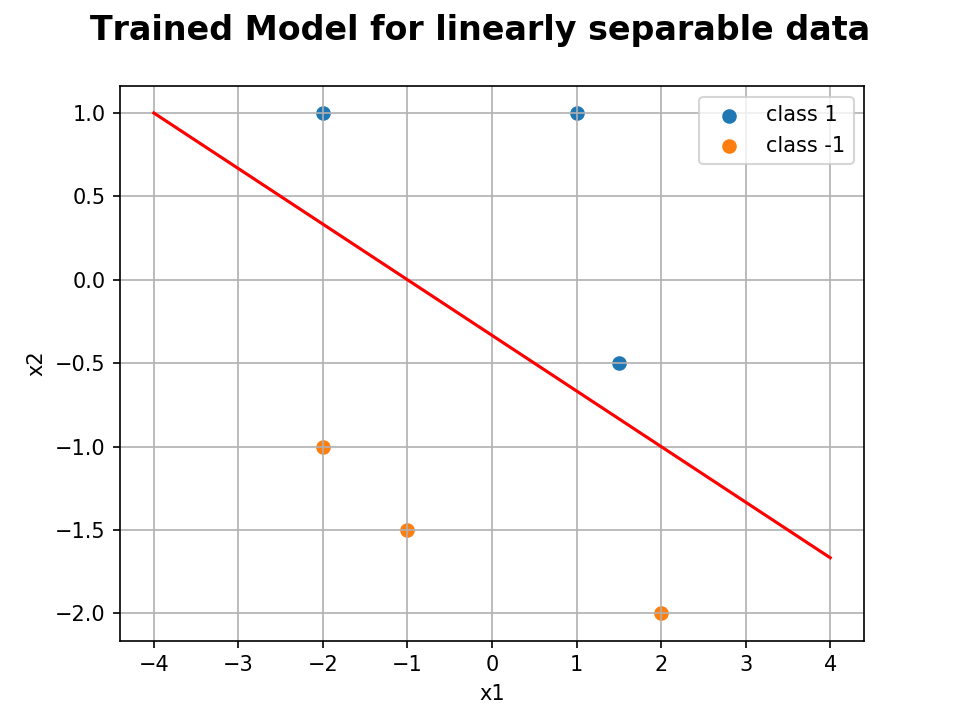

In [16]:
plot_data(x,y,weights, 'Trained Model for linearly separable data')

<IPython.core.display.Javascript object>


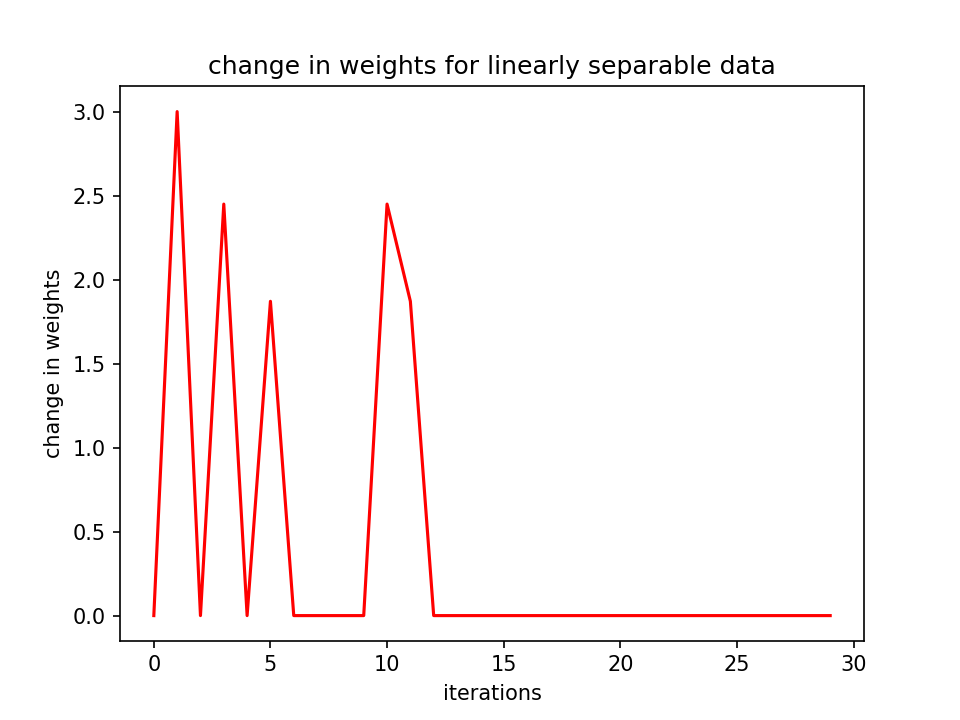

In [17]:
plt_change(weight_change_list, iters, 'change in weights for linearly separable data')

## Problem 1.3: introducing data point to make the input not linearly sperable

In [25]:
x_nonLinear = np.concatenate((x, np.array([[1, 1, 0]])),axis=0)
y_nonLinear = np.concatenate((y, np.array([-1])), axis = 0)


In [22]:
#inititialize a weight vector
we = np.zeros(3)

# for random initialization uncomment the below line
# w = np.array([random.uniform(0,1.0),random.uniform(0,1.0),random.uniform(0,1.0)])
epocs = 12

w_nl, w_ch_nl, iters = perceptron(x_nonLinear, y_nonLinear, we, epocs)

misclassified found at iteration =  1
misclassified found at iteration =  3
misclassified found at iteration =  5
misclassified found at iteration =  6
misclassified found at iteration =  11
misclassified found at iteration =  12
misclassified found at iteration =  13
misclassified found at iteration =  19
misclassified found at iteration =  20
misclassified found at iteration =  26
misclassified found at iteration =  27
misclassified found at iteration =  33
misclassified found at iteration =  34
misclassified found at iteration =  39
misclassified found at iteration =  40
misclassified found at iteration =  41
misclassified found at iteration =  45
misclassified found at iteration =  47
misclassified found at iteration =  48
misclassified found at iteration =  53
misclassified found at iteration =  54
misclassified found at iteration =  55
misclassified found at iteration =  61
misclassified found at iteration =  62
misclassified found at iteration =  68
misclassified found at iterat

<IPython.core.display.Javascript object>


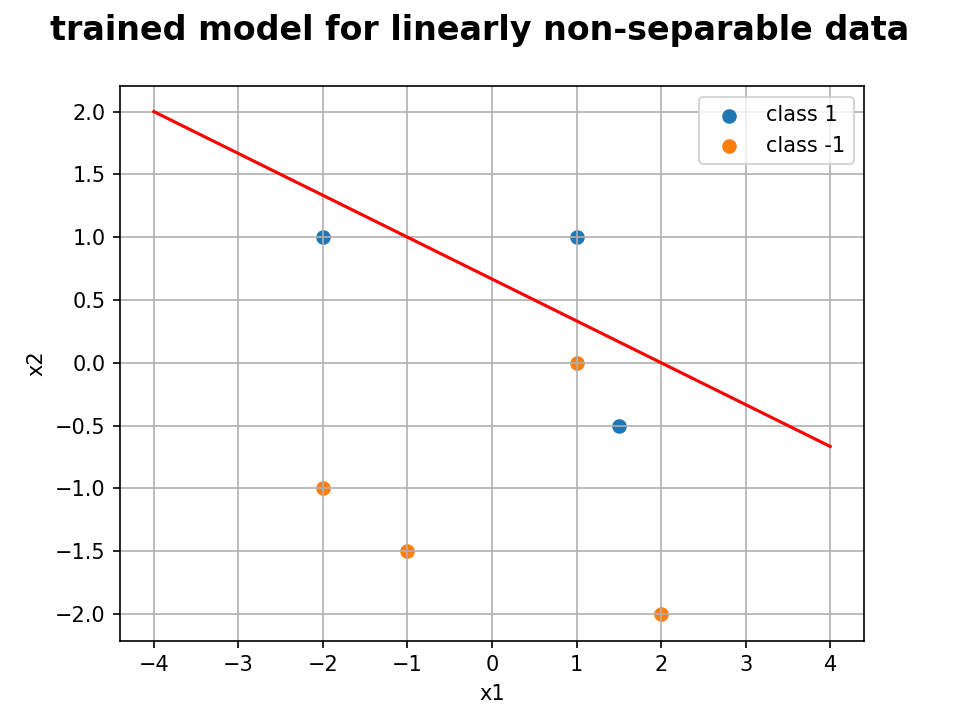

In [23]:
plot_data(x_nonLinear, y_nonLinear, w_nl, 'trained model for linearly non-separable data')

<IPython.core.display.Javascript object>


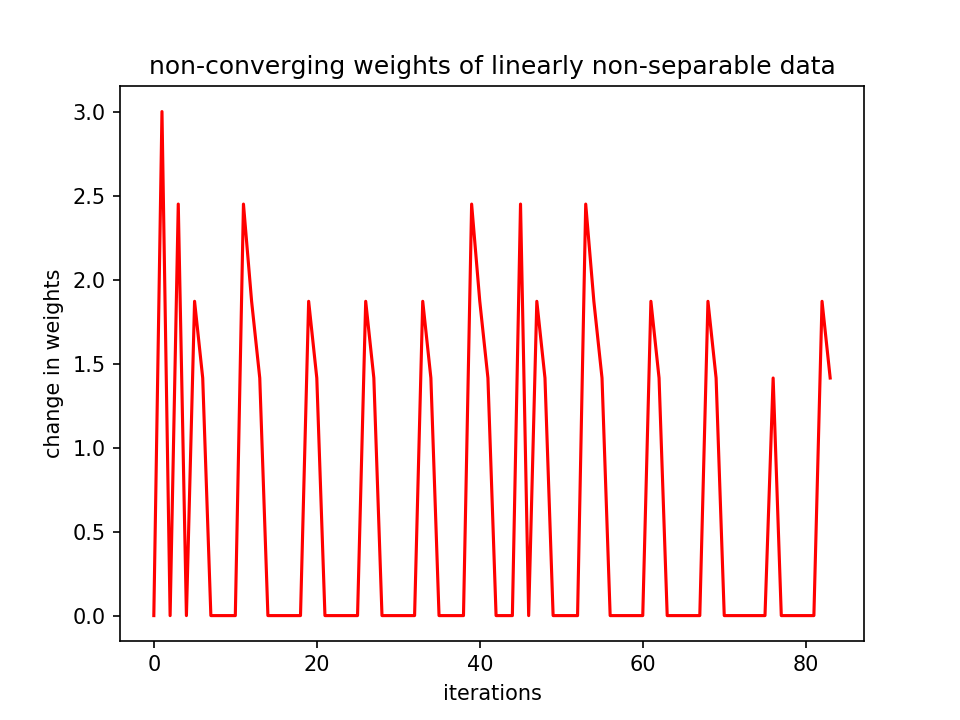

In [24]:
plt_change(w_ch_nl, iters, 'non-converging weights of linearly non-separable data')